In [68]:
.libPaths("/home/rstudio/R/x86_64-pc-linux-gnu-library/3.4")

In [69]:
library(pdftools)
library(wordcloud)
library(tm)
library(twitteR)
library(RCurl)
library(RJSONIO)
library(stringr)
library(tidyverse)

In [70]:
api_key <- ""
api_secret <- ""
token <- ""
token_secret <- ""

In [71]:
setup_twitter_oauth(api_key, api_secret, token, token_secret)

[1] "Using direct authentication"


In [72]:
tweets <- searchTwitter("Donald Trump", n=500, lang="en")
df <- do.call("rbind", lapply(tweets, as.data.frame))
myCleanedText <- sapply(df$text, function(x) iconv(enc2utf8(x), sub = "byte"))

In [73]:
source <- VectorSource(myCleanedText)

In [74]:
corpus <- VCorpus(source)

In [75]:
clean_corpus <- tm_map(corpus, removeNumbers)
clean_corpus <- tm_map(corpus, removePunctuation)
clean_corpus <- tm_map(corpus, PlainTextDocument)

In [76]:
tdm <- TermDocumentMatrix(clean_corpus)
dtm <- DocumentTermMatrix(clean_corpus)

### Bar chart

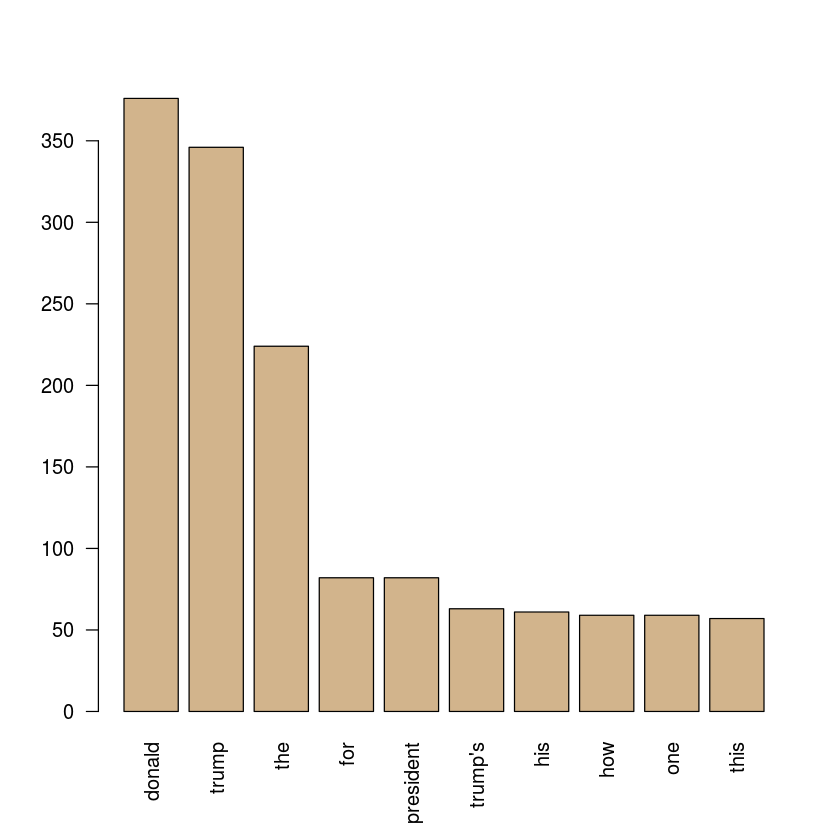

In [79]:
matrix <- as.matrix(tdm)
term_frequency <- rowSums(matrix)
term_frequency <- sort(term_frequency, decreasing = TRUE)
barplot(term_frequency[1:10], col = "tan", las = 2)

### Wordcloud

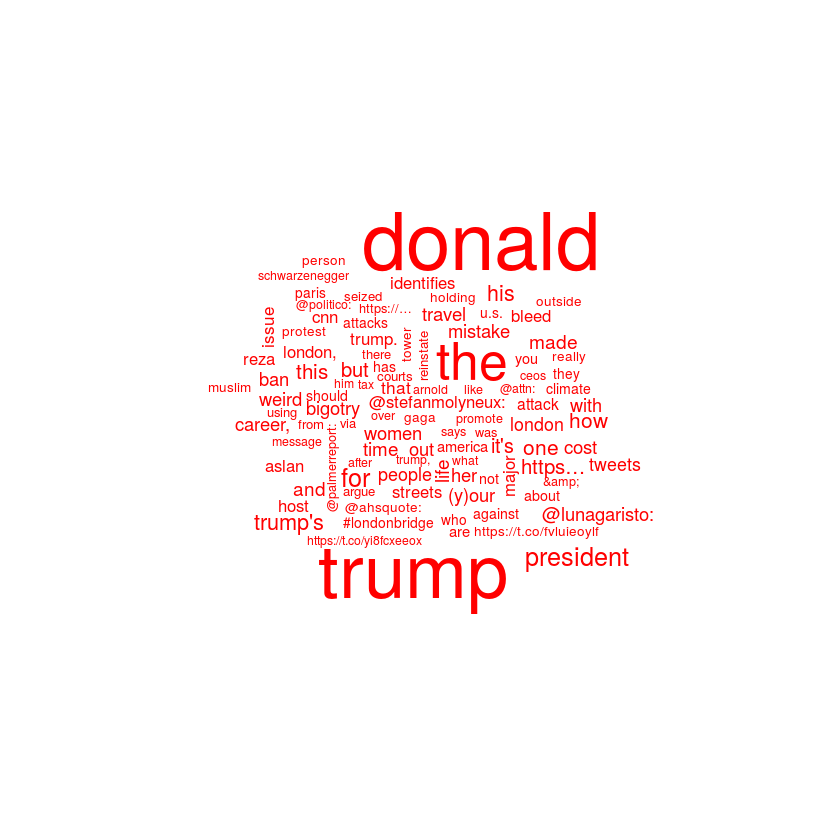

In [81]:
word_freqs <- data.frame(term = names(term_frequency), num = term_frequency)
wordcloud(word_freqs$term, word_freqs$num, max.words = 100, colors = "red")

### Total number of words and documents

In [88]:
tdm$ncol
tdm$nrow

[1] 500

[1] 1828

### Calculate least frequent number from bottom 15

In [92]:
v <- sort(rowSums(matrix), decreasing=TRUE)
d <- data.frame(word = names(v), freq=v)
tail(d, 15)

,word,freq
writing,writing,1
written,written,1
wrong?,wrong?,1
#xrim,#xrim,1
(y),(y),1
years,years,1
yes,yes,1
“you,“you,1
youngest,youngest,1
yourse…,yourse…,1


### Calculate top 10 words

In [93]:
head(d, 10)

,word,freq
donald,donald,376
trump,trump,346
the,the,224
for,for,82
president,president,82
trump's,trump's,63
his,his,61
how,how,59
one,one,59
this,this,57


### Identify important parties/character and compute association between parties
Pending